# PROGRESS REPORT #1
##### Rachel Veenstra
##### March 19, 2019

## Outcomes Accomplished:

### Import .csv files from the KSU Crops dropbox.


- Path for accessing files in dropbox is user-dependent
- Prompts used to identify user and navigate to dropbox on computer

In [1]:
import glob
import pandas as pd

print("Hello! Please provide your user name so the necessary files on this computer can be accessed.")
user_name = input()

data_file_n = '/Users/' + user_name + 
'/Dropbox/CropProdLabKSU/Lab Analysis/VISIONlite Results/Nitrates'

glob.os.chdir(data_file_n)

print("Please provide the name of a nitrate datasheet:")
n_data = input()

nit_df = pd.read_csv(str(n_data) + '.csv')

data_file_u = '/Users/' + user_name + 
'/Dropbox/CropProdLabKSU/Lab Analysis/VISIONlite Results/Ureides'

glob.os.chdir(data_file_u)

print('Please provide the name of the corresponding ureide datasheet:')
u_data = input()

ur_df = pd.read_csv(str(u_data) + '.csv')

Hello! Please provide your user name so the necessary files on this computer can be accessed.


 Rachel Veenstra


Please provide the name of a nitrate datasheet:


 LIF Ashland Nit 12-13-18


Please provide the name of the corresponding ureide datasheet:


 LIF Ashland 11-15-18


In [2]:
print(nit_df.head())
print(ur_df.head())

  Sample Name  410 nm   [A]
0         1_1         0.004
1         1_2         0.003
2         2_1         0.001
3         2_2         0.003
4        0.00         0.006
  Sample Name  535 nm   [A]
0         1_1         0.008
1         1_2         0.005
2         2_1         0.004
3         2_2         0.005
4        0.00         0.003


### Recognize that there are two repetitions for each sample, quantify the variance between the two, and take the mean of samples with acceptable variance.

In [23]:
nit_df.rename(columns = {'Sample Name':'ID', '410 nm   [A]':'B'}, inplace=True)

nit_g = nit_df.groupby('ID')

nit_final=nit_df.merge(nit_g.mean(),on='ID')
nit_final2=nit_final.merge(abs(nit_g.max()-nit_g.min())/nit_g.max(), on='ID')
nit_final2.rename(columns = {'B':'Var', 'B_x':'Abs', 'B_y':'Mean'}, inplace=True)

nit_final2[16:20]

,ID,Abs,Mean,Var
16,LIF-241,1.181,1.187,0.010059
17,LIF-241,1.193,1.187,0.010059
18,LIF-242,1.101,1.122,0.036745
19,LIF-242,1.143,1.122,0.036745


### Generate a curve based on the intersection of the concentration and absorbance values of the standards, and export for later viewing.


Nitrate Calibration Curve


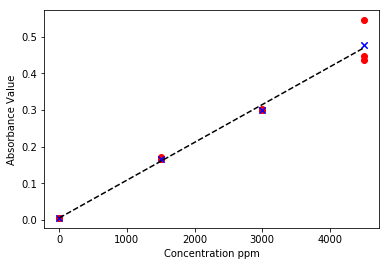

absorbance = 0.000103(concentration) + 0.005967
concentration = (absorbance - 0.005967) / 0.000103


In [10]:
import matplotlib.pylab as plt
import pylab
import numpy

c = (0,0,0,1500,1500,1500,3000,3000,3000,4500,4500,4500)
a = nit_final2.iloc[4:16, 1]
m = nit_final2.iloc[4:16, 2]

pylab.plot(c, a, "ro")
pylab.plot(c, m,'bx')
pylab.ylabel("Absorbance Value")
pylab.xlabel("Concentration ppm")

z = numpy.polyfit(c, m, 1, rcond=None, full=False, w=None, cov=False)
p = numpy.poly1d(z)
pylab.plot(c, p(c),"k--")
print("Nitrate Calibration Curve")
pylab.show()
print("absorbance = %.6f(concentration) + %.6f"%(z[0],z[1]))
print("concentration = (absorbance - %.6f) / %.6f"%(z[1],z[0]))

x=z[1]
y=z[0]

### Plot absorbance means of each sample on the curve to yield final concentration values, throwing an error message for samples with unacceptable variance values.


In [22]:
Concentration = []

for key, row in nit_final2.iterrows():
    if float(row['Var']) > 0.1:
        Concentration.append('Error')
    else:
        Concentration.append(((float(row['Mean']) -x)/y).round(3))
        
nit_final2["Concentration"] = Concentration
Nitrate_final = nit_final2.drop(nit_final2.columns[[1, 2, 3]], axis=1)
Nitrate_final[16:20]

,ID,Concentration
16,LIF-241,11468.8
17,LIF-241,11468.8
18,LIF-242,10837.6
19,LIF-242,10837.6


### Export these values (after running separately for ureides and nitrates) to a single file and match based on sample id information. 

### There are four columns on the final .csv file - sample id, ureide concentration, nitrate concentration, and the RAU value.


In [24]:
Complete_UN = Ureide_final.merge(Nitrate_final, on='ID')
Complete_UN.rename(columns = {'Concentration_x':'Conc_Ureides', 'Concentration_y':'Conc_Nitrates'}, inplace=True)
Complete_UN

RAU = []

for key, row in Complete_UN.iterrows():
    if str(row['Conc_Ureides']) == "Error":
        RAU.append("Error")
    elif str(row['Conc_Nitrates']) == "Error":
        RAU.append("Error")
    else:
        RAU.append((float(row['Conc_Ureides'])*4)/(float(row['Conc_Ureides'])*4 + float(row["Conc_Nitrates"])))

Complete_UN["RAU"] = RAU
Complete_UN

FINAL_RAU = Complete_UN.drop_duplicates(subset=['ID'])
FINAL_RAU[8:10]

,ID,Conc_Ureides,Conc_Nitrates,RAU
40,LIF-241,933.195,11468.8,0.245552
44,LIF-242,834.201,10837.6,0.23541


## Outcomes to be Addressed:

### Within the file, identify what is a standard and what is a sample.


### Ask/prompt the user to identify parameters of dry tissue/solvent amounts used.


### Respond accordingly based on the parameters given in the previous answer (i.e. run with expected dilution factor or adjust for differences).
